In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# reading and importing data
data = pd.read_csv('Documents/_F1950_CO_InitData__202508181139.csv')

   dbId  Construction (IFC Type)/C_PDS_Discipline_Code  \
0   1.0                                            6.0   
1   4.0                                            3.0   
2   5.0                                            3.0   
3   6.0                                            3.0   
4   7.0                                            3.0   

  Construction (IFC Type)/C_PDS_Discipline_Name  \
0                                      Drainage   
1                                     Structure   
2                                     Structure   
3                                     Structure   
4                                     Structure   

  Construction (IFC Type)/C_PDS_Discipline_ShortName  \
0                                                 DR   
1                                                 ST   
2                                                 ST   
3                                                 ST   
4                                                 ST   

   Cons

In [3]:
data.shape

(264, 124)

## Data Cleaning

In [5]:
data.columns

Index(['dbId', 'Construction (IFC Type)/C_PDS_Discipline_Code',
       'Construction (IFC Type)/C_PDS_Discipline_Name',
       'Construction (IFC Type)/C_PDS_Discipline_ShortName',
       'Construction (IFC Type)/C_PDS_Subdiscipline_Code',
       'Construction (IFC Type)/C_PDS_Subdiscipline_Name',
       'Construction (IFC Type)/C_PDS_Subdiscipline_ShortName',
       'Construction/C_PDS_Subzone_ShortName',
       'Construction/C_PDS_WorkArea_ShortName',
       'Construction/C_PDS_Zone_ShortName',
       ...
       'Contractor Attributes.X_MAP_AST', 'Contractor Attributes.X_MAP_USs',
       'Contractor Attributes.X_MAP_UpDown',
       'Contractor Attributes.X_WB1_4 Grade',
       'Contractor Attributes.X_WB1_5 Section', 'Retrieve Uniclass Name',
       'Classification Code Exists', 'Level', 'Category', 'Family Name'],
      dtype='object', length=124)

The dataset contains too many columns, most of them are left null or not needed for the data exploring process.

In [6]:
# dropping columns which is not needed
target = data[['Classification Name','Classification Code']]
data = data[['dbId','IfcClass','Element/IfcExportPredefinedtype','Classification Name','Classification Code','Element/IfcName',
             'ObjectType','IFC Type/IfcExportElementTypeAs','IFC Type/IfcExportPredefinedtypeType',
             'Material','Name','Item/Type','Other (IFC Type)/Category','Other (IFC Type)/Family Name',
             'Other/Category','Other/Family','Other/Family and Type','Other/Type']]


In [7]:
# Checking null values
data.isnull().sum()

dbId                                     1
IfcClass                                 1
Element/IfcExportPredefinedtype          1
Classification Name                      0
Classification Code                      0
Element/IfcName                          1
ObjectType                               1
IFC Type/IfcExportElementTypeAs          1
IFC Type/IfcExportPredefinedtypeType     1
Material                                43
Name                                     1
Item/Type                                1
Other (IFC Type)/Category                1
Other (IFC Type)/Family Name             1
Other/Category                           1
Other/Family                             1
Other/Family and Type                    1
Other/Type                               1
dtype: int64

In [8]:
#fill null values for material variables
data['Material'] = data['Material'].fillna('Default')

In [9]:
data.head()

,dbId,IfcClass,Element/IfcExportPredefinedtype,Classification Name,Classification Code,Element/IfcName,ObjectType,IFC Type/IfcExportElementTypeAs,IFC Type/IfcExportPredefinedtypeType,Material,Name,Item/Type,Other (IFC Type)/Category,Other (IFC Type)/Family Name,Other/Category,Other/Family,Other/Family and Type,Other/Type
0,1.0,IfcDistributionChamberElement,MANHOLE,Concrete manhole systems,Ss_50_35_06_14,Plumbing Fixtures 2:Plumbing Fixtures 2:1334996,Plumbing Fixtures 2:Plumbing Fixtures 2,IfcDistributionChamberElementType,MANHOLE,Default,Plumbing Fixtures 2:Plumbing Fixtures 2:1334996,IfcDistributionChamberElement: Plumbing Fixtur...,Plumbing Fixtures,Plumbing Fixtures 2,Plumbing Fixtures,Plumbing Fixtures 2,Plumbing Fixtures 2: Plumbing Fixtures 2,Plumbing Fixtures 2
1,4.0,IfcPile,BORED,Secant pile retaining wall systems,Ss_20_60_30_80,Pile Secant 1050:PP58E:1569147,Pile Secant 1050:PP58E,IfcPileType,BORED,Default,Pile Secant 1050:PP58E:1569147,IfcPile: Pile Secant 1050:PP58E,Structural Foundations,Pile Secant 1050,Structural Foundations,Pile Secant 1050,Pile Secant 1050: PP58E,PP58E
2,5.0,IfcPile,BORED,Secant pile retaining wall systems,Ss_20_60_30_80,Pile Secant 1050:PP58E:1569148,Pile Secant 1050:PP58E,IfcPileType,BORED,Default,Pile Secant 1050:PP58E:1569148,IfcPile: Pile Secant 1050:PP58E,Structural Foundations,Pile Secant 1050,Structural Foundations,Pile Secant 1050,Pile Secant 1050: PP58E,PP58E
3,6.0,IfcPile,BORED,Secant pile retaining wall systems,Ss_20_60_30_80,Pile Secant 1050:PP58E:1569149,Pile Secant 1050:PP58E,IfcPileType,BORED,Default,Pile Secant 1050:PP58E:1569149,IfcPile: Pile Secant 1050:PP58E,Structural Foundations,Pile Secant 1050,Structural Foundations,Pile Secant 1050,Pile Secant 1050: PP58E,PP58E
4,7.0,IfcPile,BORED,Secant pile retaining wall systems,Ss_20_60_30_80,Pile Secant 1050:PP58E:1569150,Pile Secant 1050:PP58E,IfcPileType,BORED,Default,Pile Secant 1050:PP58E:1569150,IfcPile: Pile Secant 1050:PP58E,Structural Foundations,Pile Secant 1050,Structural Foundations,Pile Secant 1050,Pile Secant 1050: PP58E,PP58E


In [11]:
data.dtypes

dbId                                    float64
IfcClass                                 object
Element/IfcExportPredefinedtype          object
Classification Name                      object
Classification Code                      object
Element/IfcName                          object
ObjectType                               object
IFC Type/IfcExportElementTypeAs          object
IFC Type/IfcExportPredefinedtypeType     object
Material                                 object
Name                                     object
Item/Type                                object
Other (IFC Type)/Category                object
Other (IFC Type)/Family Name             object
Other/Category                           object
Other/Family                             object
Other/Family and Type                    object
Other/Type                               object
dtype: object

### Clean text

In [12]:
import re
import pandas as pd

def clean_text(text):
    # Handle NaN values by returning empty string or keeping as NaN
    if pd.isna(text):
        return ''  # or return text to keep as NaN
    
    text = str(text).lower()  # Convert to string first, then lowercase
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply the function to all your columns
columns_to_clean = [
    'IfcClass', 
    'Element/IfcExportPredefinedtype', 
    'Classification Name',
    'Element/IfcName', 
    'ObjectType', 
    'IFC Type/IfcExportElementTypeAs',
    'IFC Type/IfcExportPredefinedtypeType', 
    'Material', 
    'Name', 
    'Item/Type',
    'Other (IFC Type)/Category', 
    'Other (IFC Type)/Family Name', 
    'Other/Category',
    'Other/Family', 
    'Other/Family and Type', 
    'Other/Type'
]

# Apply cleaning to all columns at once
for col in columns_to_clean:
    if col in data.columns:  # Check if column exists
        data[col] = data[col].apply(clean_text)

### Analyse overlap columns

In [14]:
data.isnull().sum()

dbId                                    1
IfcClass                                0
Element/IfcExportPredefinedtype         0
Classification Name                     0
Classification Code                     0
Element/IfcName                         0
ObjectType                              0
IFC Type/IfcExportElementTypeAs         0
IFC Type/IfcExportPredefinedtypeType    0
Material                                0
Name                                    0
Item/Type                               0
Other (IFC Type)/Category               0
Other (IFC Type)/Family Name            0
Other/Category                          0
Other/Family                            0
Other/Family and Type                   0
Other/Type                              0
dtype: int64

In [59]:
feature_columns = [
    'IfcClass', 
    'Element/IfcExportPredefinedtype', 
    'Element/IfcName', 
    'ObjectType', 
    'IFC Type/IfcExportElementTypeAs',
    'IFC Type/IfcExportPredefinedtypeType', 
    'Material', 
    'Name', 
    'Item/Type',
    'Other (IFC Type)/Category', 
    'Other (IFC Type)/Family Name', 
    'Other/Category',
    'Other/Family', 
    'Other/Family and Type', 
    'Other/Type'
]


from collections import Counter
import pandas as pd

def analyse_column_overlap(data, columns):
    """Analyse how much overlap exists between columns"""
    analysis = {}
    
    for col in columns:
        if col in data.columns:
            # Get value counts
            value_counts = data[col].value_counts()
            total_values = len(data[col].dropna())
            unique_values = len(value_counts)
            
            # Calculate repetitiveness metrics
            most_common_freq = value_counts.iloc[0] if len(value_counts) > 0 else 0  # Fixed typo here
            repetitiveness = most_common_freq / total_values if total_values > 0 else 0
            
            analysis[col] = {
                'total_values': total_values,
                'unique_values': unique_values,
                'most_common_value': value_counts.index[0] if len(value_counts) > 0 else None,
                'most_common_frequency': most_common_freq,
                'repetitiveness_ratio': repetitiveness,
                'uniqueness_ratio': unique_values / total_values if total_values > 0 else 0
            }
    
    return pd.DataFrame(analysis).T

### Visualise most used words across the text variables

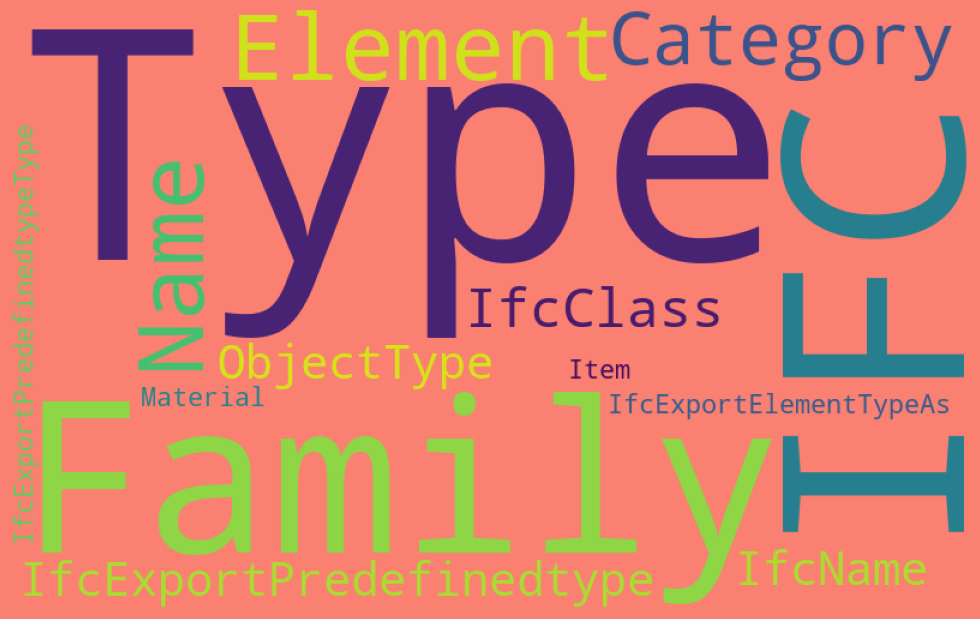

In [35]:
from wordcloud import WordCloud

text = ' '.join( info for info in data[['IfcClass', 
    'Element/IfcExportPredefinedtype', 
    'Element/IfcName', 
    'ObjectType', 
    'IFC Type/IfcExportElementTypeAs',
    'IFC Type/IfcExportPredefinedtypeType', 
    'Material', 
    'Name', 
    'Item/Type',
    'Other (IFC Type)/Category', 
    'Other (IFC Type)/Family Name', 
    'Other/Category',
    'Other/Family', 
    'Other/Family and Type', 
    'Other/Type']])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'salmon',
                       min_font_size = 10).generate(text)

plt.figure(figsize = (10,6),facecolor = 'salmon')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


### Identify groups of columns with high overlap

In [39]:
def identify_overlapping_groups (overlap_matrix, threshold=0.3):

    # Convert to numeric and fill NaN with 0
    overlap_numeric = pd.to_numeric(overlap_matrix.stack(), errors='coerce').fillna(0).unstack()
    
    groups = []
    used_columns = set()
    
    for col in overlap_numeric.index:
        if col in used_columns:
            continue
            
        # Find columns with high overlap with current column
        similar_cols = overlap_numeric.loc[col][overlap_numeric.loc[col] >= threshold].index.tolist()
        similar_cols = [c for c in similar_cols if c not in used_columns]
        
        if len(similar_cols) > 1:
            groups.append(similar_cols)
            used_columns.update(similar_cols)
    
    # Add remaining columns as individual groups
    remaining_cols = [col for col in overlap_numeric.index if col not in used_columns]
    for col in remaining_cols:
        groups.append([col])
    
    return groups

### Pairwise overlap calculation

In [49]:
def calculate_pairwise_overlap(data, columns):

    overlap_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)
    
    for col1 in columns:
        for col2 in columns:
            if col1 not in data.columns or col2 not in data.columns:
                continue
                
            if col1 == col2:
                overlap_matrix.loc[col1, col2] = 1.0
                continue
            
            # Get non-null values
            values1 = set(data[col1].dropna().astype(str).str.lower())
            values2 = set(data[col2].dropna().astype(str).str.lower())
            
            if len(values1) == 0 or len(values2) == 0:
                overlap_matrix.loc[col1, col2] = 0.0
                continue
            
            # Calculate Jaccard similarity
            intersection = len(values1 & values2)
            union = len(values1 | values2)
            jaccard = intersection / union if union > 0 else 0
            
            overlap_matrix.loc[col1, col2] = jaccard
    
    return overlap_matrix


###     Advanced text merging that preserves unique information

In [40]:
def smart_merge_group(*texts):
    # Clean texts
    clean_texts = []
    for text in texts:
        if pd.notna(text) and str(text).strip() not in ['nan', 'none', '']:
            clean_texts.append(str(text).strip())
    
    if not clean_texts:
        return ""
    if len(clean_texts) == 1:
        return clean_texts[0]
    
    # Remove exact duplicates
    unique_texts = list(dict.fromkeys([t.lower() for t in clean_texts]))
    if len(unique_texts) == 1:
        return clean_texts[0] 
    
    # Find the most comprehensive text (usually the longest with most words)
    texts_with_scores = []
    for text in clean_texts:
        score = len(text.split()) * 2 + len(text) * 0.1  # Prioritize word count
        texts_with_scores.append((text, score))
    
    # Sort by score, highest first
    texts_with_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Start with the highest scoring text
    result = texts_with_scores[0][0]
    
    # Add unique information from other texts
    for text, _ in texts_with_scores[1:]:
        result = merge_texts_advanced(result, text)
    
    return result

### Create merged features from overlapping groups

In [41]:
def create_merged_features_from_groups(data, overlapping_groups, group_names=None):
    
    merged_data = data.copy()
    
    if group_names is None:
        group_names = [f"merged_group_{i+1}" for i in range(len(overlapping_groups))]
        
    # Track which original columns went into which features
    feature_mapping = {}  
    
    for i, group in enumerate(overlapping_groups):
        group_name = group_names[i] if i < len(group_names) else f"merged_group_{i+1}"
        
        # Only merge if group has more than 1 column
        if len(group) > 1:
            existing_cols = [col for col in group if col in merged_data.columns]
            if existing_cols:
                merged_data[f'feature_{group_name}'] = merged_data[existing_cols].apply(
                    lambda row: smart_merge_group(*row.values), axis=1
                )
                feature_mapping[f'feature_{group_name}'] = existing_cols
        else:
            # Single column group - just copy with feature_ prefix
            col = group[0]
            if col in merged_data.columns:
                merged_data[f'feature_{col.replace("/", "_").replace(" ", "_").lower()}'] = merged_data[col]
                feature_mapping[f'feature_{col.replace("/", "_").replace(" ", "_").lower()}'] = [col]
    
    return merged_data, feature_mapping

### Analyse the quality of merged features for predicting targets

In [43]:
def analyse_feature_quality (data, feature_mapping, target_columns):
    print("=== Feature Quality Analysis ===\n")
    
    feature_cols = list(feature_mapping.keys())
    
    for feature_col in feature_cols:
        if feature_col not in data.columns:
            continue
            
        print(f"{feature_col}:")
        print(f"  • Original columns: {feature_mapping[feature_col]}")
        
        # Basic statistics
        non_empty = data[feature_col].astype(str).str.strip().ne('').sum()
        unique_vals = data[feature_col].nunique()
        avg_length = data[feature_col].astype(str).str.len().mean()
        
        print(f"  • Non-empty values: {non_empty:,}")
        print(f"  • Unique values: {unique_vals:,}")
        print(f"  • Average length: {avg_length:.1f} characters")
        
        # Show relationship with targets
        for target in target_columns:
            if target in data.columns:
                # Calculate how well this feature discriminates the target
                feature_target_combinations = data[[feature_col, target]].dropna()
                if len(feature_target_combinations) > 0:
                    # Information content
                    target_given_feature = feature_target_combinations.groupby(feature_col)[target].nunique().mean()
                    feature_given_target = feature_target_combinations.groupby(target)[feature_col].nunique().mean()
                    
                    print(f"  • Avg {target} classes per feature value: {target_given_feature:.2f}")
                    print(f"  • Avg feature values per {target}: {feature_given_target:.2f}")
        
        # Show examples
        examples = data[feature_col].dropna().head(3).tolist()
        print(f"  • Examples:")
        for j, example in enumerate(examples, 1):
            example_short = example[:80] + "..." if len(str(example)) > 80 else example
            print(f"    {j}. {example_short}")
        print()

### Analyse feature quality

In [52]:
def analyze_feature_quality(data, feature_mapping, target_columns):
    
    print("=== Feature Quality Analysis ===\n")
    
    feature_cols = list(feature_mapping.keys())
    
    for feature_col in feature_cols:
        if feature_col not in data.columns:
            continue
            
        print(f"{feature_col}:")
        print(f"  • Original columns: {feature_mapping[feature_col]}")
        
        # Basic statistics
        non_empty = data[feature_col].astype(str).str.strip().ne('').sum()
        unique_vals = data[feature_col].nunique()
        avg_length = data[feature_col].astype(str).str.len().mean()
        
        print(f"  • Non-empty values: {non_empty:,}")
        print(f"  • Unique values: {unique_vals:,}")
        print(f"  • Average length: {avg_length:.1f} characters")
        
        # Show relationship with targets
        for target in target_columns:
            if target in data.columns:
                # Calculate how well this feature discriminates the target
                feature_target_combinations = data[[feature_col, target]].dropna()
                if len(feature_target_combinations) > 0:
                    # Information content
                    target_given_feature = feature_target_combinations.groupby(feature_col)[target].nunique().mean()
                    feature_given_target = feature_target_combinations.groupby(target)[feature_col].nunique().mean()
                    
                    print(f"  • Avg {target} classes per feature value: {target_given_feature:.2f}")
                    print(f"  • Avg feature values per {target}: {feature_given_target:.2f}")
        
        # Show examples
        examples = data[feature_col].dropna().head(3).tolist()
        print(f"  • Examples:")
        for j, example in enumerate(examples, 1):
            example_short = example[:80] + "..." if len(str(example)) > 80 else example
            print(f"    {j}. {example_short}")
        print()

### Prepare the data for machine learning 

In [56]:
target_columns = [ 'Classification Name', 'Classification Code']

In [62]:
def prepare_ml_dataset_with_overlap_analysis(data, overlap_threshold=0.3):

    
    # Step 1: Analyze individual column characteristics
    print("Step 1: Analyzing individual columns...")
    overlap_analysis = analyse_column_overlap(data, feature_columns)
    print("Column repetitiveness analysis:")
    print(overlap_analysis.sort_values('repetitiveness_ratio', ascending=False)[['repetitiveness_ratio', 'uniqueness_ratio', 'unique_values']])
    print()
    
    # Step 2: Calculate pairwise overlaps
    print("Step 2: Calculating pairwise column overlaps...")
    overlap_matrix = calculate_pairwise_overlap(data, feature_columns)
    
    # Show highest overlaps
    high_overlaps = []
    for i in range(len(overlap_matrix.index)):
        for j in range(i+1, len(overlap_matrix.columns)):
            col1, col2 = overlap_matrix.index[i], overlap_matrix.columns[j]
            overlap_val = overlap_matrix.iloc[i, j]
            if pd.notna(overlap_val) and overlap_val > overlap_threshold:
                high_overlaps.append((col1, col2, overlap_val))
    
    high_overlaps.sort(key=lambda x: x[2], reverse=True)
    print(f"High overlap pairs (>{overlap_threshold}):")
    for col1, col2, overlap in high_overlaps[:10]:
        print(f"  {col1} ↔ {col2}: {overlap:.3f}")
    print()
    
    # Step 3: Identify overlapping groups
    print("Step 3: Identifying overlapping column groups...")
    overlapping_groups = identify_overlapping_groups(overlap_matrix, overlap_threshold)
    
    print("Identified groups:")
    for i, group in enumerate(overlapping_groups, 1):
        print(f"  Group {i}: {group}")
    print()
    
    # Step 4: Create merged features
    print("Step 4: Creating merged features from overlapping groups...")
    
    # Create meaningful group names based on content
    group_names = []
    for group in overlapping_groups:
        if len(group) > 1:
            # Create name based on common themes
            group_str = "_".join([col.split('/')[-1].replace(' ', '_').lower() for col in group])
            if len(group_str) > 30:
                group_str = f"group_{'_'.join(group_str.split('_')[:3])}"
            group_names.append(group_str)
        else:
            group_names.append(group[0].split('/')[-1].replace(' ', '_').lower())
    
    merged_data, feature_mapping = create_merged_features_from_groups(data, overlapping_groups, group_names)
    
    # Step 5: Analyze feature quality
    print("Step 5: Analyzing merged feature quality...")
    analyze_feature_quality(merged_data, feature_mapping, target_columns)
    
    # Step 6: Prepare final ML dataset
    print("Step 6: Preparing final ML dataset...")
    feature_cols = list(feature_mapping.keys())
    
    # Create clean dataset with features and targets
    ml_columns = feature_cols + target_columns
    available_columns = [col for col in ml_columns if col in merged_data.columns]
    
    ml_dataset = merged_data[available_columns].copy()
    
    # Remove rows where both targets are missing
    ml_dataset_clean = ml_dataset.dropna(subset=target_columns, how='all')
    
    print(f"Final dataset shape: {ml_dataset_clean.shape}")
    print(f"Feature columns: {len(feature_cols)}")
    print(f"Rows with both targets: {ml_dataset_clean.dropna(subset=target_columns).shape[0]:,}")
    print(f"Rows with at least one target: {ml_dataset_clean.shape[0]:,}")
    
    return {
        'ml_dataset': ml_dataset_clean,
        'feature_columns': feature_cols,
        'feature_mapping': feature_mapping,
        'overlap_analysis': overlap_analysis,
        'overlap_matrix': overlap_matrix,
        'overlapping_groups': overlapping_groups
    }

In [63]:
prep = prepare_ml_dataset_with_overlap_analysis (data)
print(prep)

=== Complete ML Dataset Preparation with Overlap Analysis ===

Step 1: Analyzing individual columns...
Column repetitiveness analysis:
                                     repetitiveness_ratio uniqueness_ratio  \
Other (IFC Type)/Category                        0.806818         0.022727   
Other/Category                                   0.806818         0.022727   
IfcClass                                         0.787879         0.022727   
Element/IfcExportPredefinedtype                  0.787879         0.022727   
IFC Type/IfcExportElementTypeAs                  0.787879         0.022727   
IFC Type/IfcExportPredefinedtypeType             0.787879         0.022727   
Other (IFC Type)/Family Name                     0.606061         0.056818   
Other/Family                                     0.606061         0.056818   
Material                                         0.556818         0.018939   
ObjectType                                       0.090909         0.090909   
Item/Ty

## Splitting training and testing data for machine learning model

In [64]:
print(data['Classification Name'].value_counts())

Classification Name
secant pile retaining wall systems     208
retention structure systems             38
concrete manhole systems                 7
reinforced concrete deck systems         5
metal post and rail fencing systems      5
default classification systems           1
Name: count, dtype: int64


In [71]:
# Get value counts
value_counts = data['Classification Name'].value_counts()

# Identify classes with only 1 member
valid_classes = value_counts[value_counts > 1].index

# Filter data
data_filtered = data[data['Classification Name'].isin(valid_classes)].copy()

In [65]:
def split_for_dual_target_classification(ml_results, approach="separate", test_size=0.2, val_size=0.1):

    ml_dataset = ml_results['ml_dataset']
    feature_cols = ml_results['feature_columns']
    
    # Filter to rows with both targets
    complete_data = ml_dataset.dropna(subset=target_columns)
    
    if len(complete_data) == 0:
        print("No rows with both targets available!")
        return None
    
    # Prepare features and targets
    X = complete_data[feature_cols]
    y1 = complete_data[target_columns[0]]  # Classification Name
    y2 = complete_data[target_columns[1]]  # Classification Code
    
    print(f"Complete data: {len(complete_data):,} rows")
    print(f"Features: {len(feature_cols)} merged columns")
    print(f"Target 1 ({target_columns[0]}): {y1.nunique():,} unique classes")
    print(f"Target 2 ({target_columns[1]}): {y2.nunique():,} unique classes")
    
    # Split based on approach
    if approach == "separate":
        # Separate models - split once, use for both targets
        X_temp, X_test, y1_temp, y1_test, y2_temp, y2_test = train_test_split(
            X, y1, y2, test_size=test_size, random_state=42, stratify=y1
        )
        
        val_size_adjusted = val_size / (1 - test_size)
        X_train, X_val, y1_train, y1_val, y2_train, y2_val = train_test_split(
            X_temp, y1_temp, y2_temp, test_size=val_size_adjusted, random_state=42, stratify=y1_temp
        )
        
        return {
            'approach': approach,
            'X_train': X_train, 'X_val': X_val, 'X_test': X_test,
            'y1_train': y1_train, 'y1_val': y1_val, 'y1_test': y1_test,
            'y2_train': y2_train, 'y2_val': y2_val, 'y2_test': y2_test,
            'feature_columns': feature_cols,
            'target_columns': target_columns,
            'ml_results': ml_results
        }


## Machine Learning pipeline

In [69]:
from sklearn.model_selection import train_test_split
def complete_pipeline(data, overlap_threshold=0.3):
    
    # Check if targets exist
    missing_targets = [col for col in target_columns if col not in data.columns]
    if missing_targets:
        print(f"Missing target columns: {missing_targets}")
        return None
    
    # Step 1: Clean the feature columns first
    print("Cleaning feature columns...")
    cleaned_data = data.copy()
    
    # Apply your clean_text function if available
    for col in feature_columns:
        if col in cleaned_data.columns:
            try:
                # Assuming clean_text function exists from previous code
                cleaned_data[col] = cleaned_data[col].apply(lambda x: clean_text(x) if pd.notna(x) else x)
            except NameError:
                # If clean_text doesn't exist, do basic cleaning
                cleaned_data[col] = cleaned_data[col].astype(str).str.lower().str.strip()
                cleaned_data[col] = cleaned_data[col].replace('nan', '')
    
    # Step 2: Overlap analysis and feature creation
    ml_results = prepare_ml_dataset_with_overlap_analysis(cleaned_data, overlap_threshold)
    
    # Step 3: Split for classification
    train_test_data = split_for_dual_target_classification(ml_results, approach="separate")
    
    print("\n=== Pipeline Complete! ===")
    print("Now you can:")
    print("1. Train separate models for each target")
    print("2. Use the merged features instead of original overlapping columns")
    print("3. Analyze feature importance to see which merged features matter most")
    
    return {
        'ml_results': ml_results,
        'train_test_data': train_test_data,
        'summary': {
            'original_features': len(feature_columns),
            'merged_features': len(ml_results['feature_columns']),
            'training_samples': len(train_test_data['X_train']) if train_test_data else 0,
            'feature_reduction': len(feature_columns) - len(ml_results['feature_columns'])
        }
    }

In [73]:
results = complete_pipeline(data_filtered,overlap_threshold = 0.3)

Cleaning feature columns...
=== Complete ML Dataset Preparation with Overlap Analysis ===

Step 1: Analyzing individual columns...
Column repetitiveness analysis:
                                     repetitiveness_ratio uniqueness_ratio  \
Other (IFC Type)/Category                        0.809886         0.019011   
Other/Category                                   0.809886         0.019011   
IfcClass                                         0.790875         0.019011   
Element/IfcExportPredefinedtype                  0.790875         0.019011   
IFC Type/IfcExportElementTypeAs                  0.790875         0.019011   
IFC Type/IfcExportPredefinedtypeType             0.790875         0.019011   
Other (IFC Type)/Family Name                     0.608365         0.053232   
Other/Family                                     0.608365         0.053232   
Material                                         0.555133         0.019011   
ObjectType                                       0.091255

In [74]:
ml_results = results['ml_results']
train_test_data = results['train_test_data']

In [100]:
print(train_test_data['X_train'].columns.tolist())

['feature_group_ifcexportpredefinedtype_ifcexportpredefinedtypetype', 'feature_ifcname_name', 'feature_category_category', 'feature_family_name_family', 'feature_ifcclass', 'feature_objecttype', 'feature_ifc_type_ifcexportelementtypeas', 'feature_material', 'feature_item_type', 'feature_other_family_and_type', 'feature_other_type']


## Vectorising the text columns on training dataset

In [101]:
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

#Vectorise text features
tfidf = TfidfVectorizer(max_features=500, ngram_range=(1,2))
X_train_vec = tfidf.fit_transform(train_test_data['X_train'].apply(lambda x: ' '.join(x.astype(str)), axis=1))
X_test_vec = tfidf.transform(train_test_data['X_test'].apply(lambda x: ' '.join(x.astype(str)), axis=1))


## Training Machine Models and Evaluation

In [111]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
models = {
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Maximum Entropy': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
}

# Train and evaluate for both targets
results = {}
# y1_train, y1_val, y2_train, y2_val
for target_name, y_train, y_test in [
    ('Classification Name', train_test_data['y1_train'], train_test_data['y1_test']),
    ('Classification Code', train_test_data['y2_train'], train_test_data['y2_test'])
]:
    target_results = {}
    
    for model_name, model in models.items():
        # Train
        model.fit(X_train_vec, y_train)
        
        # Predict
        y_pred = model.predict(X_test_vec)
        
        # Store results
        target_results[model_name] = {
            'f1_weighted': f1_score(y_test, y_pred, average='weighted'),
            'f1_macro': f1_score(y_test, y_pred, average='macro'),
            'model': model,
            'predictions': y_pred
        }
    
    results[target_name] = target_results

In [112]:
# Create comparison dataframe
comparison_data = []

for target_name, target_results in results.items():
    for model_name, metrics in target_results.items():
        comparison_data.append({
            'Target Variable': target_name,
            'Model': model_name,
            'F1 Weighted': metrics['f1_weighted'],
            'F1 Macro': metrics['f1_macro']
        })

comparison_df = pd.DataFrame(comparison_data)
comparison_pivot = comparison_df.pivot_table(
    index='Model', 
    columns='Target Variable', 
    values=['F1 Weighted', 'F1 Macro']
).round(3)

print("=== Model Comparison ===")
print(comparison_pivot)

=== Model Comparison ===
                           F1 Macro                             F1 Weighted  \
Target Variable Classification Code Classification Name Classification Code   
Model                                                                         
Decision Tree                 1.000               1.000               1.000   
Maximum Entropy               1.000               1.000               1.000   
Naive Bayes                   0.798               0.798               0.972   

                                     
Target Variable Classification Name  
Model                                
Decision Tree                 1.000  
Maximum Entropy               1.000  
Naive Bayes                   0.972  


In [117]:
# Generate detailed reports
detailed_reports = {}
for target_name, target_results in results.items():
    print(f"\n=== Detailed Reports for {target_name} ===")
    
    for model_name, metrics in target_results.items():
        print(f"\n{model_name}:")
        y_true = train_test_data['y1_test'] if 'Name' in target_name else train_test_data['y2_test']
        
        print(classification_report(y_true, metrics['predictions']))
        
        # Store for later access
        detailed_reports[f"{target_name}_{model_name}"] = classification_report(
            y_true, metrics['predictions'], output_dict=True
        )


=== Detailed Reports for Classification Name ===

Naive Bayes:
                                     precision    recall  f1-score   support

           concrete manhole systems       0.00      0.00      0.00         1
metal post and rail fencing systems       1.00      1.00      1.00         1
   reinforced concrete deck systems       1.00      1.00      1.00         1
        retention structure systems       1.00      1.00      1.00         8
 secant pile retaining wall systems       0.98      1.00      0.99        42

                           accuracy                           0.98        53
                          macro avg       0.80      0.80      0.80        53
                       weighted avg       0.96      0.98      0.97        53


Decision Tree:
                                     precision    recall  f1-score   support

           concrete manhole systems       1.00      1.00      1.00         1
metal post and rail fencing systems       1.00      1.00      1.00   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

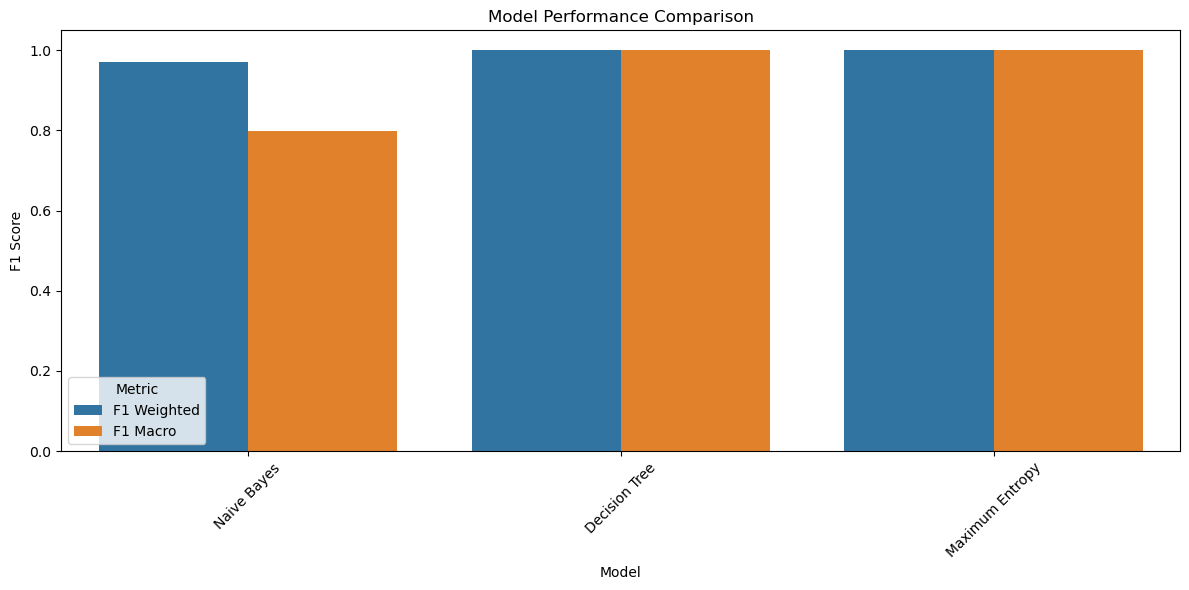

In [118]:
# Plot comparison
plt.figure(figsize=(12, 6))

# F1 Score comparison
comparison_melted = comparison_df.melt(id_vars=['Target Variable', 'Model'], 
                                      value_vars=['F1 Weighted', 'F1 Macro'])

sns.barplot(data=comparison_melted, x='Model', y='value', hue='variable')
plt.title('Model Performance Comparison')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [120]:
# If targets are correlated
from sklearn.multioutput import MultiOutputClassifier

# Combine encoded targets
y_multi_train = np.column_stack([train_test_data['y1_train'], train_test_data['y2_train']])
y_multi_test = np.column_stack([train_test_data['y1_test'], train_test_data['y2_test']])

# Train multi-output models
multi_results = {}
for model_name, model in models.items():
    multi_model = MultiOutputClassifier(model, n_jobs=-1)
    multi_model.fit(X_train_vec, y_multi_train)
    y_pred = multi_model.predict(X_test_vec)
    
    # Evaluate both targets
    f1_name = f1_score(y_multi_test[:, 0], y_pred[:, 0], average='weighted')
    f1_code = f1_score(y_multi_test[:, 1], y_pred[:, 1], average='weighted')
    
    multi_results[model_name] = {'F1_Name': f1_name, 'F1_Code': f1_code}

In [121]:
# Final recommendation
def get_recommendation(comparison_df):
    name_results = comparison_df[comparison_df['Target Variable'] == 'Classification Name']
    code_results = comparison_df[comparison_df['Target Variable'] == 'Classification Code']
    
    best_name = name_results.loc[name_results['F1 Weighted'].idxmax()]
    best_code = code_results.loc[code_results['F1 Weighted'].idxmax()]
    
    print(f"Recommended for Classification Name: {best_name['Model']} (F1: {best_name['F1 Weighted']:.3f})")
    print(f"Recommended for Classification Code: {best_code['Model']} (F1: {best_code['F1 Weighted']:.3f})")

get_recommendation(comparison_df)

Recommended for Classification Name: Decision Tree (F1: 1.000)
Recommended for Classification Code: Decision Tree (F1: 1.000)


In [130]:
import pickle

In [131]:
Model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
Model.fit(X_train_vec, y_train)
y_pred = Model.predict(X_test_vec)
                                

In [132]:
with open("model.pkl", "wb") as model_file:
    pickle.dump(y_pred, model_file)